In [5]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm
import math
import statistics
from scipy.optimize import fsolve
##plt.rcParams['text.usetex'] = False
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'
from gaussian_functions import *

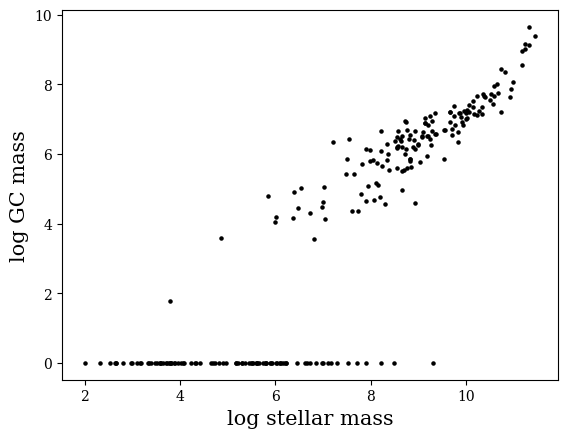

In [8]:
################################################
## GC MASS

## data that Shany sent on slack  
## from Clearing the Hurdle: The Mass of Globular Cluster Systems as a Function of Host Galaxy Mass
## Gwendolyn M. Eadie et al 2022 ApJ 926 162

dataGC = np.genfromtxt('/home/vk9342/JP_fall_2024/best_sample.txt', skip_header=1, delimiter=',')
log_M_GC = dataGC[:, 2] # log GC Mass (in solar masses)
log_M_S = dataGC[:, 4] #log Stellar Mass


###plot a scatter plot of said data
plt.scatter(log_M_S, log_M_GC, s=5, color = 'black')  ## Mgc or Mgc/Ms????
plt.xlabel('log stellar mass', fontsize=15)
plt.ylabel('log GC mass', fontsize=15)
plt.show()


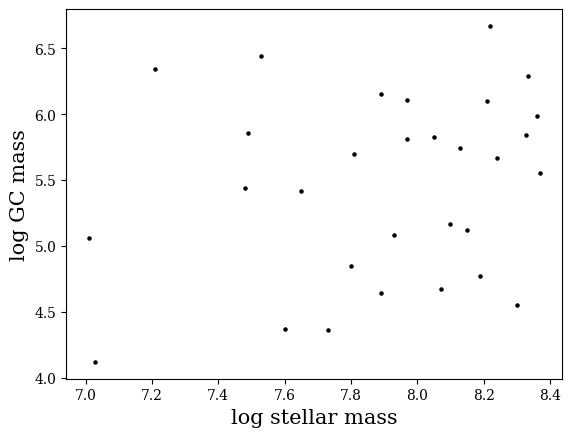

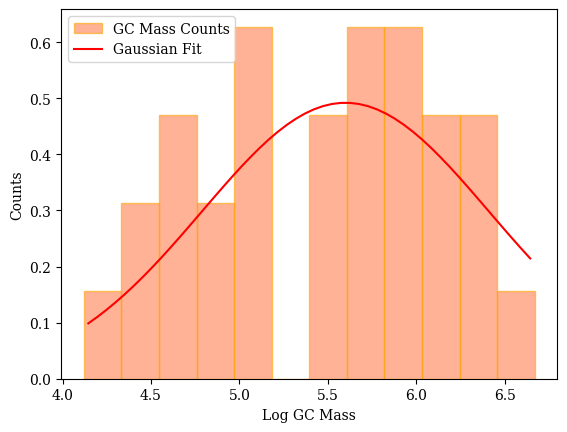

In [10]:
################# VERTICAL STRIPE #################

### choose a range of stellar masses to isolate a vertical 'stripe from data'
## get stellar and GC masses within stripe
def GC_stripe_func (logMStellar):
    if 8.5 <= logMStellar <= 9:
        lbound = 8.5
        ubound = 9
        histbins = 10
    elif 9 < logMStellar <= 10.5:
        lbound = 9
        ubound = 10.5
        histbins = 12 #??
    elif 7 <= logMStellar < 8.5:
        lbound = 7
        ubound = 8.5
        histbins = 12

    dataGC = np.genfromtxt('/home/vk9342/JP_fall_2024/best_sample.txt', skip_header=1, delimiter=',')
    log_M_GC = dataGC[:, 2] # log GC Mass (in solar masses)
    log_M_S = dataGC[:, 4] #log Stellar Mass
    log_M_GCstripe = [] 
    log_M_Sstripe = []
    n = len(log_M_GC)
    for i in range (n):
        if log_M_S[i] >= lbound and log_M_S[i] <= ubound and log_M_GC[i]!=0:
            log_M_GCstripe.append(log_M_GC[i])
            log_M_Sstripe.append(log_M_S[i])
    return [log_M_GCstripe, log_M_Sstripe, histbins]


logMstellar = 7
log_M_GCstripe, log_M_Sstripe, histbins = GC_stripe_func (logMstellar)

# plt.xlim(1, 12)
# plt.ylim(0, 10)
plt.scatter(log_M_Sstripe, log_M_GCstripe, s=5, color='black')
plt.xlabel('log stellar mass', fontsize=15)
plt.ylabel('log GC mass', fontsize=15)
plt.show()


################### DISTRIBUTION #################


plt.hist(log_M_GCstripe, histbins, alpha=0.6, label='GC Mass Counts', color='coral', edgecolor='orange', density = True)

params = Gaussian_params(log_M_GCstripe, bins=10) ## best fit params for if GC masses were split into 10 bins 
curve_bin_centers = Gaussian_counts_bincenters(log_M_GCstripe, 50)[1] ## get bin centers for if historgram of GC masses was split into 50 bins - will be used as x values for gaussian curve

plt.plot(curve_bin_centers, Gaussian(curve_bin_centers, *params), 'r-', label='Gaussian Fit')
plt.xlabel('Log GC Mass')
plt.ylabel('Counts')
plt.legend()
plt.show()


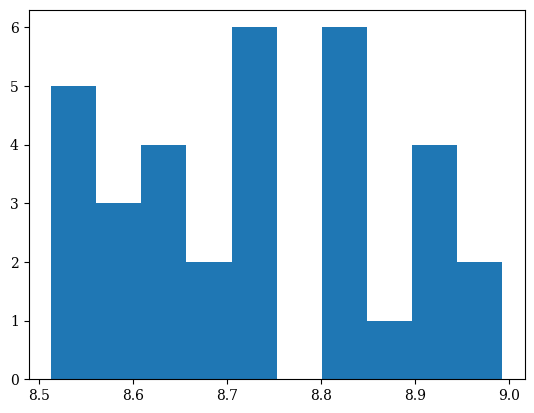

In [11]:
############ Stellar Mass hist #####
logMstellar = 8.7
log_M_GCstripe, log_M_Sstripe, histbins = GC_stripe_func (logMstellar)
plt.figure()
plt.hist(log_M_Sstripe, bins = 10)
plt.show()

# Sample GC MASS

In [14]:
#####################   SAMPLING MASSES FROM DISTRIBUTION ############################    
##sampling GC Mass for a given Stellar Mass
def GC_random_sample (logMStellar, n):
    log_M_GCstripe, log_M_Sstripe, histbins = GC_stripe_func (logMStellar)
    mu, sigma = Gaussian_params(M_GCstripe, bins=10)
    sample_masses = np.random.normal(mu, sigma, n)
    return sample_masses

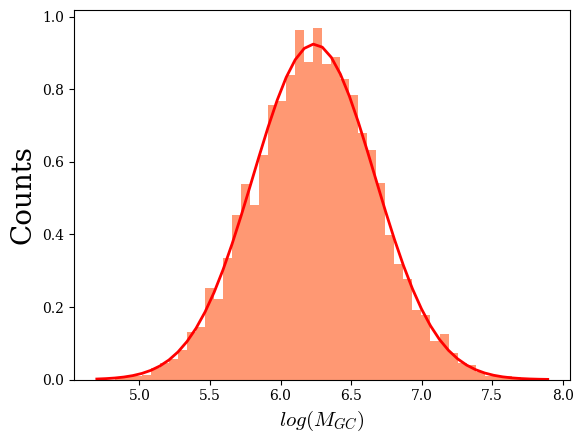

In [15]:
logMstellar = 8.5
n = 5000
sample = GC_random_sample (logMstellar, n)
count, bins, ignoored = plt.hist(sample, 50, density=True, color = 'coral', alpha=0.8)
plt.plot(bins, Gaussian(bins, muGC, sigmaGC), linewidth=2, color='r')
plt.xlabel('$log(M_{GC})$', fontsize= 15)
plt.ylabel('Counts', fontsize = 20)
plt.show()